<a href="https://colab.research.google.com/github/PSLMssGerd44/Works-/blob/main/Traffic_data_Exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy.stats import skewtest, levene
from scipy import stats
from scipy import optimize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.datasets import *


In [ ]:
!pip install mglearn;

     |████████████████████████████████| 540 kB 14.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=b1429e12931bf25a57aa7902d3e429e7508fd22b86b83fe675610c5efa4164c3
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
import mglearn

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


Saving traffic_violaions.csv to traffic_violaions.csv
User uploaded file "traffic_violaions.csv" with length 4968166 bytes
mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle competitions list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
path="/content/traffic_violaions.csv"
data= pd.read_csv(path)
data.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
data.shape

(52966, 15)

In [ ]:
data.columns

Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [ ]:
data.dtypes

stop_date              object
stop_time              object
country_name          float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted       object
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop     object
dtype: object

In [ ]:
data.index

RangeIndex(start=0, stop=52966, step=1)

In [ ]:
data.describe(exclude='object')

,country_name,driver_age_raw,driver_age
count,0.0,49588.000000,49346.000000
mean,NaN,1965.712229,34.171483
std,NaN,132.195712,12.769907
min,NaN,0.000000,15.000000
25%,NaN,1965.000000,23.000000
50%,NaN,1977.000000,31.000000
75%,NaN,1985.000000,43.000000
max,NaN,8801.000000,88.000000


In [ ]:
data.describe(exclude='float64')

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
count,52966,52965,49580,49581,49581,49581,52965,2085,49581,49581,49581,52965
unique,2223,1427,2,5,11,5,2,23,6,2,3,2
top,5/16/2007,11:00,M,White,Speeding,Speeding,False,Incident to Arrest,Citation,False,0-15 Min,False
freq,62,256,36564,37364,32139,32139,50880,941,45931,47712,37433,52569


In [ ]:
data.isnull().sum()

stop_date                 0
stop_time                 1
country_name          52966
driver_gender          3386
driver_age_raw         3378
driver_age             3620
driver_race            3385
violation_raw          3385
violation              3385
search_conducted          1
search_type           50881
stop_outcome           3385
is_arrested            3385
stop_duration          3385
drugs_related_stop        1
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


In [ ]:
data.isna()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52961,False,False,True,True,True,True,True,True,True,False,True,True,True,True,False
52962,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
52963,False,False,True,True,True,True,True,True,True,False,True,True,True,True,False
52964,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


Problemas que tiene el conjunto de datos
- Nombres de las columnas (index)
- Tipos de datos
- Distribución/Nulos

In [ ]:
type(data.columns.str.lower().str.replace(" ","_"))

pandas.core.indexes.base.Index

In [ ]:
## limpiando datos:##

In [ ]:
data.columns

Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [ ]:
data.columns=data.columns.str.lower().str.replace(" ","_",regex=True).str.strip()
clean_data=data.columns
data.rename(columns={'search_conducted':'search_cond'}).head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_cond,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
##df.plot

##df[100:200].plot(y='Producto4',x='Fecha',kind='scatter',figsize=(15,4))

###Unique --> únicos valor no repetido ##df["Producto4"].unique()

##df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


country_name                 NaN
driver_age_raw        132.195712
driver_age             12.769907
search_conducted        0.194465
is_arrested             0.190462
drugs_related_stop      0.086145
dtype: float64

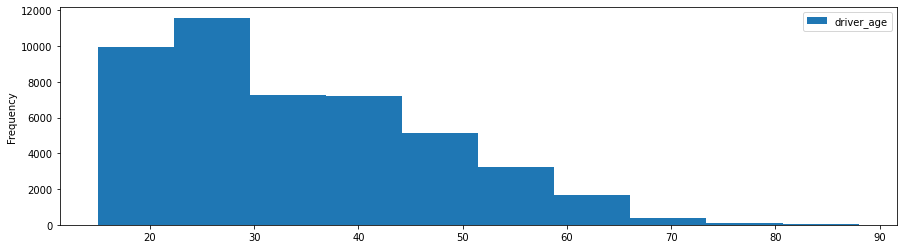

In [ ]:
data.plot
data[100:50000].plot(y='driver_age', x='stop_date', kind='hist', figsize=(15,4))
data.std()

In [ ]:
data.columns

Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [ ]:
## Procesamiento de datos nulos

data.isna().head() 

data.isnull().head()

data.isna().sum()*100/data.shape[0]


stop_date               0.000000
stop_time               0.001888
country_name          100.000000
driver_gender           6.392780
driver_age_raw          6.377676
driver_age              6.834573
driver_race             6.390892
violation_raw           6.390892
violation               6.390892
search_conducted        0.001888
search_type            96.063512
stop_outcome            6.390892
is_arrested             6.390892
stop_duration           6.390892
drugs_related_stop      0.001888
dtype: float64

In [ ]:
data = data.drop('country_name', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
data.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [ ]:
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
data.set_index('stop_date', inplace=True) # df = df.set_index('Fecha')
data.head()

,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
stop_date,,,,,,,,,,,,,
1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
data[['driver_age']].describe()

,driver_age
count,49346.000000
mean,34.171483
std,12.769907
min,15.000000
25%,23.000000
50%,31.000000
75%,43.000000
max,88.000000


In [ ]:
data[['driver_age']].mean()

driver_age    34.171483
dtype: float64

In [ ]:
data.rolling(3).mean().head()

,driver_age_raw,driver_age
stop_date,,
1/2/2005,NaN,NaN
1/18/2005,NaN,NaN
1/23/2005,1974.000000,31.000000
2/20/2005,1974.333333,30.666667
3/14/2005,1980.666667,24.333333


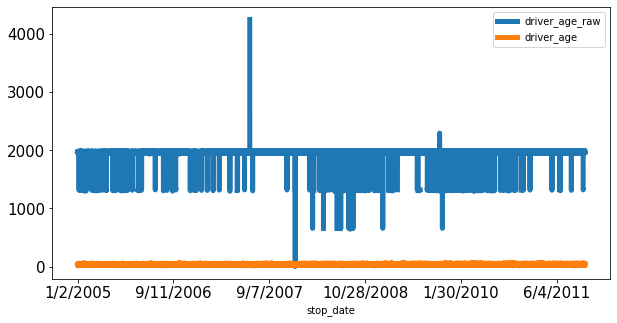

In [ ]:
age = data[['driver_age']]
data.rolling(3).mean().plot(figsize=(10,5), linewidth=5, fontsize=15)
plt.xlabel('stop_date', fontsize=10);

In [ ]:
data[['search_type']]

,search_type
stop_date,
1/2/2005,NaN
1/18/2005,NaN
1/23/2005,NaN
2/20/2005,NaN
3/14/2005,NaN
...,...
10/5/2011,NaN
10/5/2011,NaN
10/5/2011,NaN


In [ ]:
data['driver_gender'].dropna()

stop_date
1/2/2005     M
1/18/2005    M
1/23/2005    M
2/20/2005    M
3/14/2005    F
            ..
10/4/2011    M
10/4/2011    F
10/4/2011    F
10/5/2011    M
10/5/2011    F
Name: driver_gender, Length: 49580, dtype: object

In [ ]:
data['driver_age'].dropna()

stop_date
1/2/2005     20.0
1/18/2005    40.0
1/23/2005    33.0
2/20/2005    19.0
3/14/2005    21.0
             ... 
10/4/2011    32.0
10/4/2011    44.0
10/4/2011    20.0
10/5/2011    25.0
10/5/2011    25.0
Name: driver_age, Length: 49346, dtype: float64

In [ ]:
data['violation_raw'].dropna()

stop_date
1/2/2005             Speeding
1/18/2005            Speeding
1/23/2005            Speeding
2/20/2005    Call for Service
3/14/2005            Speeding
                   ...       
10/4/2011            Speeding
10/4/2011            Speeding
10/4/2011            Speeding
10/5/2011            Speeding
10/5/2011            Speeding
Name: violation_raw, Length: 49581, dtype: object

In [ ]:
data['violation'].dropna()

stop_date
1/2/2005     Speeding
1/18/2005    Speeding
1/23/2005    Speeding
2/20/2005       Other
3/14/2005    Speeding
               ...   
10/4/2011    Speeding
10/4/2011    Speeding
10/4/2011    Speeding
10/5/2011    Speeding
10/5/2011    Speeding
Name: violation, Length: 49581, dtype: object

In [ ]:
data['stop_outcome'].dropna()

stop_date
1/2/2005          Citation
1/18/2005         Citation
1/23/2005         Citation
2/20/2005    Arrest Driver
3/14/2005         Citation
                 ...      
10/4/2011    Arrest Driver
10/4/2011         Citation
10/4/2011         Citation
10/5/2011         Citation
10/5/2011         Citation
Name: stop_outcome, Length: 49581, dtype: object

In [ ]:
data['is_arrested'].dropna()

stop_date
1/2/2005     False
1/18/2005    False
1/23/2005    False
2/20/2005     True
3/14/2005    False
             ...  
10/4/2011     True
10/4/2011    False
10/4/2011    False
10/5/2011    False
10/5/2011    False
Name: is_arrested, Length: 49581, dtype: object

In [ ]:
data['stop_duration'].dropna()

stop_date
1/2/2005      0-15 Min
1/18/2005     0-15 Min
1/23/2005     0-15 Min
2/20/2005    16-30 Min
3/14/2005     0-15 Min
               ...    
10/4/2011     0-15 Min
10/4/2011     0-15 Min
10/4/2011     0-15 Min
10/5/2011     0-15 Min
10/5/2011     0-15 Min
Name: stop_duration, Length: 49581, dtype: object

In [ ]:
data['search_type'].dropna()

stop_date
8/28/2005    Incident to Arrest,Protective Frisk
10/1/2005                         Probable Cause
10/1/2005                         Probable Cause
10/2/2005                     Incident to Arrest
10/3/2005                         Probable Cause
                            ...                 
10/1/2011                         Probable Cause
10/2/2011                     Incident to Arrest
10/2/2011                     Incident to Arrest
10/3/2011                     Incident to Arrest
10/3/2011                     Incident to Arrest
Name: search_type, Length: 2085, dtype: object

In [ ]:
data['search_type'].dropna().mode()

0    Incident to Arrest
dtype: object

In [ ]:
data.groupby("search_type").count()

,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
search_type,,,,,,,,,,,,
Incident to Arrest,941,941,941,941,941,941,941,941,941,941,941,941
"Incident to Arrest,Inventory",90,90,90,90,90,90,90,90,90,90,90,90
"Incident to Arrest,Inventory,Probable Cause",21,21,21,21,21,21,21,21,21,21,21,21
"Incident to Arrest,Inventory,Protective Frisk",11,11,11,11,11,11,11,11,11,11,11,11
"Incident to Arrest,Inventory,Reasonable Suspicion",2,2,2,2,2,2,2,2,2,2,2,2
"Incident to Arrest,Probable Cause",68,68,68,68,68,68,68,68,68,68,68,68
"Incident to Arrest,Probable Cause,Protective Frisk",10,10,10,10,10,10,10,10,10,10,10,10
"Incident to Arrest,Probable Cause,Reasonable Suspicion",3,3,3,3,3,3,3,3,3,3,3,3
"Incident to Arrest,Protective Frisk",31,31,31,31,31,31,31,31,31,31,31,31


Tipos de búsqueda después de parar un vehículo

In [ ]:
data.groupby("search_type").aggregate(["min", "max", "median"])

driver_age_raw          \
                                                              min     max   
search_type                                                                 
Incident to Arrest                                         1930.0  1993.0   
Incident to Arrest,Inventory                               1947.0  1992.0   
Incident to Arrest,Inventory,Probable Cause                1951.0  1988.0   
Incident to Arrest,Inventory,Protective Frisk              1957.0  1986.0   
Incident to Arrest,Inventory,Reasonable Suspicion          1974.0  1981.0   
Incident to Arrest,Probable Cause                          1958.0  1992.0   
Incident to Arrest,Probable Cause,Protective Frisk         1969.0  1990.0   
Incident to Arrest,Probable Cause,Reasonable Su...         1980.0  1985.0   
Incident to Arrest,Protective Frisk                        1953.0  1989.0   
Incident to Arrest,Protective Frisk,Reasonable ...         1969.0  1969.0   
Incident to Arrest,Reasonable Suspicion                    1954.0  1988.0   
Inventory                                                  1944.0  1991.0   
Inventory,Probable Cause                                   1977.0  1991.0   
Inventory,Probable Cause,Protective Frisk                  1979.0  1986.0   
Inventory,Probable Cause,Reasonable Suspicion              1985.0  1985.0   
Inventory,Protective Frisk                                 1964.0  1987.0   
Inventory,Reasonable Suspicion                             1976.0  1981.0   
Probable Cause                                             1951.0  1994.0   
Probable Cause,Protective Frisk                            1947.0  1990.0   
Probable Cause,Reasonable Suspicion                        1968.0  1991.0   
Protective Frisk                                              0.0  1992.0   
Protective Frisk,Reasonable Suspicion                      1964.0  2001.0   
Reasonable Suspicion                                       1939.0  1992.0   

                                                           driver_age        \
                                                    median        min   max   
search_type                                                                   
Incident to Arrest                                  1979.0       15.0  79.0   
Incident to Arrest,Inventory                        1981.0       18.0  58.0   
Incident to Arrest,Inventory,Probable Cause         1980.0       20.0  55.0   
Incident to Arrest,Inventory,Protective Frisk       1975.0       20.0  49.0   
Incident to Arrest,Inventory,Reasonable Suspicion   1977.5       25.0  32.0   
Incident to Arrest,Probable Cause                   1980.0       18.0  51.0   
Incident to Arrest,Probable Cause,Protective Frisk  1982.5       18.0  37.0   
Incident to Arrest,Probable Cause,Reasonable Su...  1982.0       25.0  29.0   
Incident to Arrest,Protective Frisk                 1979.0       18.0  57.0   
Incident to Arrest,Protective Frisk,Reasonable ...  1969.0       37.0  37.0   
Incident to Arrest,Reasonable Suspicion             1968.5       20.0  56.0   
Inventory                                           1979.0       18.0  65.0   
Inventory,Probable Cause                            1986.0       20.0  34.0   
Inventory,Probable Cause,Protective Frisk           1982.5       23.0  27.0   
Inventory,Probable Cause,Reasonable Suspicion       1985.0       22.0  22.0   
Inventory,Protective Frisk                          1986.5       18.0  42.0   
Inventory,Reasonable Suspicion                      1978.5       29.0  30.0   
Probable Cause                                      1983.0       16.0  58.0   
Probable Cause,Protective Frisk                     1982.0       19.0  60.0   
Probable Cause,Reasonable Suspicion                 1983.0       18.0  40.0   
Protective Frisk                                    1979.0       17.0  50.0   
Protective Frisk,Reasonable Suspicion               1976.5       18.0  44.0   
Reasonable Suspicion                                1980.0       18.0  68

Quienes fueron más arrestados ¿Hombres o mujeres?

In [ ]:
data.groupby(['driver_gender', 'search_type'])['driver_age'].aggregate('sum').unstack()

search_type,Incident to Arrest,"Incident to Arrest,Inventory","Incident to Arrest,Inventory,Probable Cause","Incident to Arrest,Inventory,Protective Frisk","Incident to Arrest,Inventory,Reasonable Suspicion","Incident to Arrest,Probable Cause","Incident to Arrest,Probable Cause,Protective Frisk","Incident to Arrest,Probable Cause,Reasonable Suspicion","Incident to Arrest,Protective Frisk","Incident to Arrest,Protective Frisk,Reasonable Suspicion",...,"Inventory,Probable Cause,Protective Frisk","Inventory,Probable Cause,Reasonable Suspicion","Inventory,Protective Frisk","Inventory,Reasonable Suspicion",Probable Cause,"Probable Cause,Protective Frisk","Probable Cause,Reasonable Suspicion",Protective Frisk,"Protective Frisk,Reasonable Suspicion",Reasonable Suspicion
driver_gender,,,,,,,,,,,,,,,,,,,,,
F,5139.0,398.0,50.0,NaN,NaN,225.0,NaN,NaN,172.0,NaN,...,23.0,NaN,NaN,NaN,1465.0,39.0,144.0,403.0,NaN,327.0
M,25226.0,2297.0,584.0,360.0,57.0,1750.0,245.0,81.0,780.0,37.0,...,27.0,22.0,237.0,59.0,10873.0,616.0,641.0,3123.0,284.0,3429.0


In [ ]:
data.pivot_table('search_type',['driver_gender'],['driver_age'],aggfunc="sum")

driver_age,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,...,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,86.0,88.0
driver_gender,,,,,,,,,,,,,,,,,,,,,
F,0,Incident to Arrest,Incident to ArrestProbable Cause,Incident to ArrestIncident to ArrestIncident t...,InventoryProbable CauseIncident to ArrestInven...,"Protective FriskProbable Cause,Reasonable Susp...",Incident to ArrestIncident to ArrestProbable C...,"Incident to ArrestInventoryIncident to Arrest,...",Incident to ArrestProbable CauseIncident to Ar...,Incident to ArrestIncident to ArrestProtective...,...,0,0,0,0,0,0,NaN,0,NaN,NaN
M,Incident to Arrest,Incident to ArrestProbable Cause,Probable CauseProbable CauseProtective FriskPr...,Incident to ArrestProbable CauseProtective Fri...,Probable CauseReasonable SuspicionIncident to ...,Probable CauseIncident to ArrestIncident to Ar...,Incident to ArrestIncident to ArrestIncident t...,Protective FriskIncident to ArrestIncident to ...,InventoryIncident to ArrestProtective FriskInc...,Reasonable SuspicionIncident to ArrestIncident...,...,0,0,Incident to Arrest,0,0,0,0,0,0,0


Como primera conclusión, pudimos deducir que el género más propenso a cometer violaciones de tránsito son los hombres.

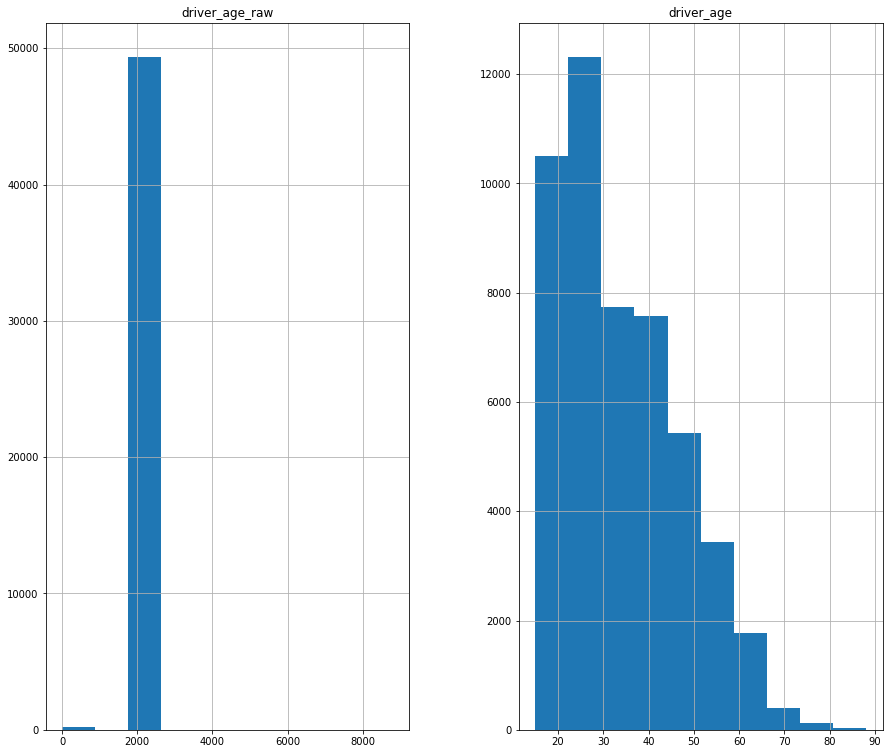

In [ ]:
data.hist(figsize=(15,13))
plt.show()

TypeError: ignored

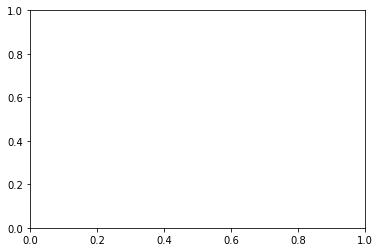

In [ ]:
data.plot(kind="scatter", y = "driver_age", x = "stop_time", alpha = 0.4)

In [ ]:
print(levene(data["driver_age"],data["stop_time"]))

In [ ]:
sns.histplot(data1 = data, x = "stop_date", kde = True, bins=20)

In [ ]:
corr_p = data.corr()
corr_k = data.corr(method = "kendall")
corr_s = data.corr(method = "spearman")

corr_p

In [ ]:
corr_p["driver_age"].sort_values(ascending=False)

In [ ]:
corr_k["driver_age"].sort_values(ascending=False)

In [ ]:
corr_s["driver_age"].sort_values(ascending=False)

In [ ]:
attributes = ["driver_age","driver_age_raw","horsepower","price"]

In [ ]:
######el comando fillna() para reemplazar los valores nulos con el valor deseado. 
######Puede hacerse en una sola columna df.columna.fillna() o en todas al mismo tiempo df.fillna()
### Solo visual
##df.Producto4.fillna(0)

### Cambiando los datos

##df.Producto4.fillna(df.Producto4.mean(),inplace=True) #Importante inplace
##df.head()

In [ ]:
#df.drop('Producto4',axis=1)

#df.Producto4.isna() --> False y True

#df[df.Producto4.isna()] --> filtra por los verdaderos

# .index --> los indices 

#df.drop(df[df.Producto4.isna()].index)

In [ ]:
## Indexación y locaclización
##df.iloc[100:110] #slice index,column [index1:index2:paso,icolumns]

##df[['Producto1','Producto4']].iloc[100:110] # df.iloc[100:110,0:5:4]  <-- indexación para subconjunto de columnas

##df.iloc[:,1:3]

##df.loc["2009-10-01":"2009-12-31"] <- por fechas

In [ ]:
######Date time####
##dftest = pd.DataFrame(df.index)

##dftest.dtypes

#dftest.Fecha.dt.year -> #Puedo acceder a ellas como columna usando el método dt

#df.index.day ->. #Para los index se puede usar directamente (acceder al array tipo datetime64ns)


In [ ]:
##Parar reasignar un valor de dataframe, simplemente se debe saber la localización, 
##ya sea por indice o por etiqueta y usar el operador de asignación =

In [ ]:
##df.iloc[109,0]=1000 #asignando

## df[['Producto1']].iloc[108:110]

##df.loc['2009-04-19','Producto1']=999

##df[['Producto1']].iloc[108:110] -> validar reasignación de los valores

##df.iloc[109,0] = "bla bla"  ->. #Asignación pude cambiarme la clase de toda la columna

In [ ]:
### Organización de Dataframes###
##El método sort_values permite organizar los dataframes con base a los valores de las columnas o las filas

In [ ]:
#try:
  #df.sort_values(by="Producto1").head()
#except Exception as e:
  #print(e)

##df.sort_values(by="Producto2",ascending=False).head()

##df.sort_values(by=["Producto2","Producto3"],ascending=False).head()

In [ ]:
### Graficando##

##df.Producto2.plot(figsize=(15,3))

##df.plot(figsize=(17,3))

##df.Producto2.plot(kind='hist',bins=20)

##df.boxplot()

##df.plot(y="Producto3",x="Producto4",kind="scatter")

In [ ]:
####operaciones con columnas y filas###

#def function(row,verbose=False):
  #if verbose:
    #print(row)
  #return row.mean()

#def function2(col,verbose=False):
  #if verbose:
    #print(col)
  #return col.std()

##df.iloc[:10].apply(function2,axis=0, args={"verbose":True})

##df.apply

##df['Producto3sqrt'] = df.Producto3.apply(np.sqrt) #apply --> aplica un función a cada columna

#Seleccción de columnas
##df[[col for col in df.columns if col!="Producto1"]].apply(np.sum, axis=0)

##df[['Producto3']].apply(np.sum)

##df[['Producto3']].applymap(lambda cell: True if cell<100 else False) # df['Producto3']*porce - util

##df[['Producto3']].apply(lambda col: col<100 )

##type(df.sum())

##df.sum().plot(kind='pie')

In [ ]:
## Hacer un filtro ###

#filtrar un dataframe por una condición
##df[df['Producto4'].isna()]

##df['Producto1']    --> Serie
##df[['Producto1']]  --> Dataframe

#Tipo Objeto
#Ineficiente cuando df es muy grande
##[(i,v) for i,v in enumerate(df.Producto1) if type(v) == str]

##def find_type(row,op="str"):
  #if op=="str":
    #return type(row) == str

#cond = df[['Producto1']].applymap(find_type)['Producto1']

##df[df['Producto1'] == 'bla bla'] #Filtro normal para las columnas

##df[['Producto1']].applymap(type)

In [ ]:
#####bines###
##La función cut nos permite separar los datos en bloques (bins)##

##df.Producto1[:10]

###Se puede seleccionar el número de bins deseado y el programa obtiene la distribución óptima de los mismos###
##pd.cut(df.Producto1[:10], bins=3)

##pd.cut(df.Producto1[:10],bins=[0,100,200,300]) ->>> seleccionar bines deseados

##pd.cut(df.Producto1[:10],bins=3, labels=['bajo','medio','alto'])

In [ ]:
### data wrangling###

##Lo primero que debemos hacer es modificar los nombres de las columnas con el fin de evitar espacios dentro de ellos. 
##Para realizar lo anterior, podemos usar reasignar 
##a df.columns una lista con el nombre de las columnas que deseemos.

##df.columns = ['month', 'diet', 'gym', 'finance']
##df.head()

##Posteriormente, convertimos la columna month en un tipo de dato DateTime para convertirlo en el índice del DataFrame.
##Usaremos el método .to_datetime() para convertir la columna 'mes' del DataFrame a DateTime.
##Se debe tener cuidado de incluir el argumento inplace cuando configure el índice del DataFrame
## df para que realmente modifique el índice original y lo configure en la columna 'mes'.

##df.month = pd.to_datetime(df.month)
##df.set_index('month', inplace=True) #inplace --> las funciones de DF hacen copias... 
#df = df.set_index()
##df.head()

In [ ]:
###Exploración de Datos##

###DataFrames.plot()
##df.plot(figsize=(10,5), linewidth=3, fontsize=20)
##plt.xlabel('Year', fontsize=15)

##Si se quiere visualizar solo una columna de los datos, se debe especificar como una lista:
##type(df['diet']) #Seleccionar una fila o columna de DataFrame == Serie

##df[['diet']].plot(figsize=(10,5), linewidth=3, fontsize=20)
##plt.xlabel('Year', fontsize=15);

##Podemos incluir mas de una columna en la lista
##df[['diet','gym']].plot(figsize=(10,5), linewidth=3, fontsize=20)
##plt.xlabel('Year', fontsize=15);

In [ ]:
####Caracterizando####

###tendencias###
##df.rolling(3).mean().head()

